Analisis Data Tingkat Kebahagiaan di Dunia tahun 2019

Nama: Muhammad Rizaldy

NIM: 10119040

Universitas: ITB

Tanggal mulai pengerjaan: 11 November 2020

Sumber dataset: https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv

Dari dataset yang telah diperoleh, kita ingin mengetahui bagaimana variabel - variabel yang ada memengaruhi tingkat kebahagiaan di suatu negara. Oleh karena itu, kita akan menggunakan model *multiple linear regression* untuk memprediksi hal tersebut.

Data Preparation

In [28]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [ ]:
# Upload dataset
from google.colab import files
data = files.upload()

In [29]:
# Import dataset
df = pd.read_csv('Tingkat kebahagiaan dunia 2019.csv')

In [30]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Data Preprocessing

In [31]:
# Mengganti label kolom pada data yang digunakan agar lebih mudah di analisis
df.columns = ['rank', 'country', 'score', 'GDP', 'social_support', 'healthy', 'freedom', 'generosity', 'POC']

In [32]:
# Menghilangkan kolom rank karena tidak akan diperlukan
df = df.drop(columns='rank')

In [15]:
df.head()

,country,score,GDP,social_support,healthy,freedom,generosity,POC
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [33]:
# Ingin mengetahui apakah ada data NaN atau kosong
df.isnull().sum()

country           0
score             0
GDP               0
social_support    0
healthy           0
freedom           0
generosity        0
POC               0
dtype: int64

Exploratory Data

In [34]:
# Ingin mengetahui statistik dasar pada data
df.describe()

,score,GDP,social_support,healthy,freedom,generosity,POC
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [35]:
# Ingin mengetahui posisi Indonesia
dfind = df[(df.country=="Indonesia")]
dfind

,country,score,GDP,social_support,healthy,freedom,generosity,POC
91,Indonesia,5.192,0.931,1.203,0.66,0.491,0.498,0.028


Berdasarkan score yang Indonesia peroleh, yaitu 5.192, tingkat kebahagiaan di Indonesia masih berada di bawah rata-rata negara-negara di dunia.

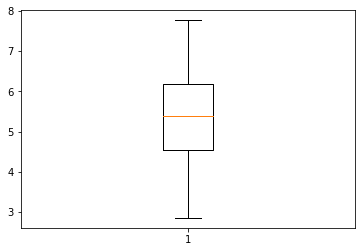

In [47]:
# Melihat sebaran data pada score tiap negara
plt.boxplot(df['score'])
plt.show()

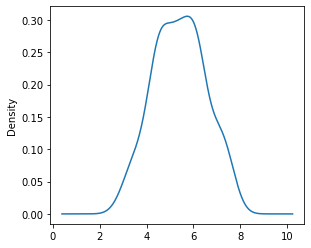

In [66]:
f = plt.figure(figsize=(10,4))
f.add_subplot(1,2,1)
df['score'].plot(kind='kde')

Berdasarkan hasil plotting yang kita peroleh, nilai score berdistribusi normal. Sebagian besar data score terletak di rentang 4 s.d. 6 dan data juga tidak memiliki pencilan. 

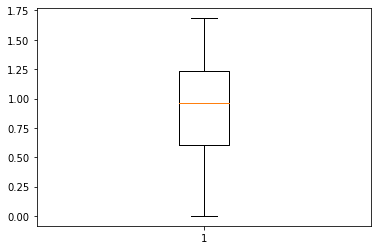

In [62]:
# Melihat sebaran data pada GDP tiap negara
plt.boxplot(df['GDP'])
plt.show()

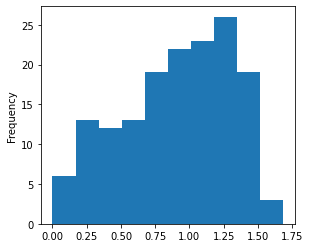

In [71]:
f = plt.figure(figsize=(10,4))
f.add_subplot(1,2,1)
df['GDP'].plot(kind='hist')

Berdasarkan hasil plotting yang kita peroleh, GDP di negara dunia memiliki persebaran yang menceng kiri . Sebagian besar GDP terletak di rentang 1 s.d. 1.25 dan data juga tidak memiliki pencilan.

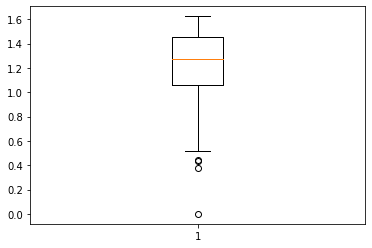

In [72]:
# Melihat sebaran data pada social_support tiap negara
plt.boxplot(df['social_support'])
plt.show()

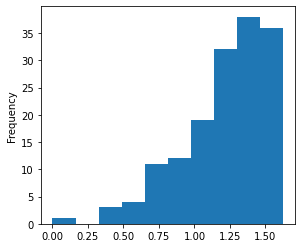

In [75]:
f = plt.figure(figsize=(10,4))
f.add_subplot(1,2,1)
df['social_support'].plot(kind='hist')

Berdasarkan hasil plotting yang kita peroleh, kepedulian sosial di negara dunia memiliki persebaran yang menceng kiri . Sebagian besar kepedulian sosial terletak di rentang 1.25 s.d. 1.50 dan data memiliki pencilan bawah.

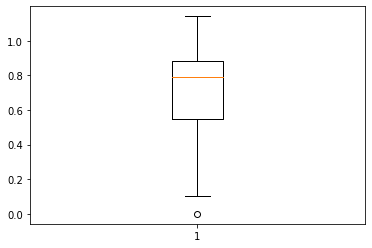

In [76]:
# Melihat sebaran data pada healthy tiap negara
plt.boxplot(df['healthy'])
plt.show()

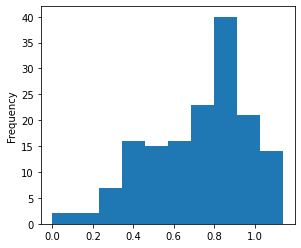

In [78]:
f = plt.figure(figsize=(10,4))
f.add_subplot(1,2,1)
df['healthy'].plot(kind='hist')

Berdasarkan hasil plotting yang kita peroleh, tingkat kesehatan di negara dunia memiliki persebaran yang menceng kiri . Sebagian besar social_support terletak di rentang 0.8 s.d. 1.0 dan data memiliki pencilan bawah.

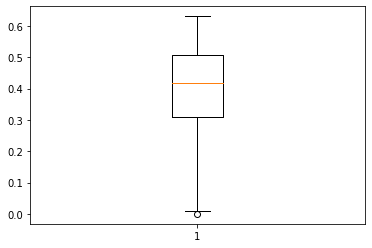

In [79]:
# Melihat sebaran data pada healthy tiap negara
plt.boxplot(df['freedom'])
plt.show()

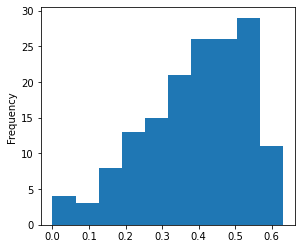

In [80]:
f = plt.figure(figsize=(10,4))
f.add_subplot(1,2,1)
df['freedom'].plot(kind='hist')

Berdasarkan hasil plotting yang kita peroleh, tingkat kebebasan dalam menjalani kehidupan di negara dunia memiliki persebaran yang menceng kiri . Sebagian besar tingkat kebebasan dalam menjalani kehidupan terletak di rentang 0.40 s.d. 0.55 dan data memiliki pencilan bawah, artinya ada negara yang memiliki tingkat kebebasan jauh di bawah negara-negara lainnya.

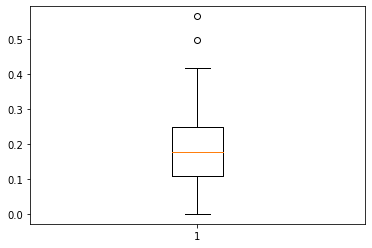

In [81]:
# Melihat sebaran data pada generosity tiap negara
plt.boxplot(df['generosity'])
plt.show()

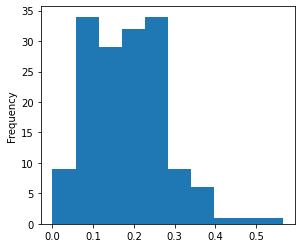

In [82]:
f = plt.figure(figsize=(10,4))
f.add_subplot(1,2,1)
df['generosity'].plot(kind='hist')

Berdasarkan hasil plotting yang kita peroleh, tingkat kedermawanan di negara dunia memiliki persebaran yang menceng kanan . Sebagian besar tingkat kedermawanan terletak di rentang 0.1 s.d. 0.3 dan data memiliki pencilan atas, artinya ada negara yang memiliki tingkat kedermawanan jauh di atas negara-negara lainnya.

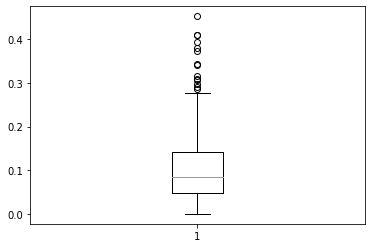

In [83]:
# Melihat sebaran data pada POC tiap negara
plt.boxplot(df['POC'])
plt.show()

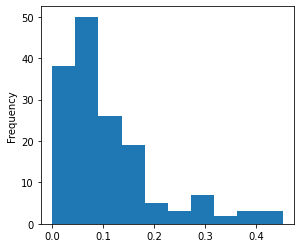

In [84]:
f = plt.figure(figsize=(10,4))
f.add_subplot(1,2,1)
df['POC'].plot(kind='hist')

Berdasarkan hasil plotting yang kita peroleh, pandangan masyarakat terhadap korupsi di negara dunia memiliki persebaran yang menceng kanan . Sebagian besar tingkat persepsi tentang korupsi terletak di rentang 0.0 s.d. 0.1 dan data memiliki pencilan atas, artinya ada negara yang masyarakatnya memiliki persepsi korupsi jauh di atas negara-negara lainnya.

Model Development

In [87]:
# Ingin mengetahui nilai korelasi dari independent variable(GDP, social_support, healthy, freedom, generosity, POC) dan dependent variable(score).
df.corr().style.background_gradient().set_precision(2)

,score,GDP,social_support,healthy,freedom,generosity,POC
score,1.00,0.79,0.78,0.78,0.57,0.08,0.39
GDP,0.79,1.00,0.75,0.84,0.38,-0.08,0.30
social_support,0.78,0.75,1.00,0.72,0.45,-0.05,0.18
healthy,0.78,0.84,0.72,1.00,0.39,-0.03,0.30
freedom,0.57,0.38,0.45,0.39,1.00,0.27,0.44
generosity,0.08,-0.08,-0.05,-0.03,0.27,1.00,0.33
POC,0.39,0.30,0.18,0.30,0.44,0.33,1.00


Berdasarkan hasil tersebut, variabel independen yang sangat memengaruhi tingkat kebahagiaan di dunia adalah GDP, kepedulian sosial di tengah masyarakat, dan tingkat kesehatan.

Model yang akan kita buat:

y = ax1 + bx2 + cx3 + dx4 + ex5 + fx6 + g, dengan

y = score

x1 = GDP

x2 = social_support

x3 = healthy

x4 = freedom

x5 = generosity

x6 = POC

a, b, c, d, e, f = koefisien variabel dari variabel independen

g = intercept

In [112]:
# Membuat variabel dependen dan independen
x = df.drop(columns=['score', 'country'])
y = df['score']

# Split data menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

# Membuat model
linreg = LinearRegression()

# Train model yang sudah kita buat
linreg.fit(x_train, y_train)

# Menentukan koefisien masing-masing variabel independen dan juga intercept
print(linreg.coef_)
print(linreg.intercept_)

[0.78142355 1.23215094 0.99457128 1.06803218 0.85070043 1.05100088]
1.7433922570762408


Berdasarkan hasil multiple linear regression kita peroleh persamaan:

y = 0.78142355x1 + 1.23215094x2 + 0.99457128x3 + 1.06803218x4 + 0.85070043x5 + 1.05100088x6 + 1.7433922570762408

In [114]:
# Menentukan akurasi skor dari model yang telah dibuat
linreg.score(x_test, y_test)

0.7268007752619288

Model kita memiliki score 72%

In [118]:
# Mencoba memprediksi tingkat kebahagiaan
linreg.predict([[1.25, 1.25, 1, 0.8, 0.1, 0.3]])

array([6.5097277])

Dari hasil prediksi model multiple linear regression, kita memperoleh prediksi tingkat kebahagiaan sebesar 6.5.